In [1]:
import test_config as cfg
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import os, os.path
import pickle
import io

import skimage
import skimage.io, skimage.transform, skimage.filters
import scipy.ndimage

import sys
sys.path.append(r'../src/')

import importlib
import transform
import filters
import local_radon
import skew_line
importlib.reload(transform)
importlib.reload(filters)
importlib.reload(local_radon)
importlib.reload(skew_line)

<module 'skew_line' from '../src\\skew_line.py'>

D:/Data/bujo_sample\20190309_125151.jpg


c:\anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\anaconda3\lib\site-packages\skimage\transform\radon_transform.py:69: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


Text angles is 0.0
Text line delta is 9
Wall time: 2.39 s


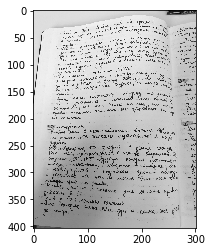

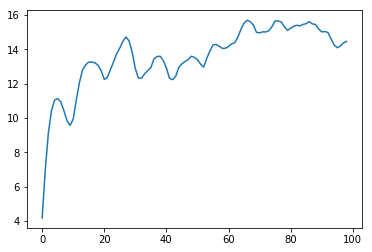

In [2]:
%%time
src_fname = os.path.join(cfg.sample_path, os.listdir(cfg.sample_path)[6])
print(src_fname)

src = skimage.io.imread(src_fname, as_grey=True)
text_angle = transform.get_text_angle(skimage.transform.rescale(src, scale=0.05))
print('Text angles is {}'.format(text_angle[0][0]))

src3 = skimage.transform.rotate(skimage.transform.rescale(src, scale=0.1), -90.0-text_angle[0][0], resize=True)
srcr = skimage.transform.rotate(skimage.transform.rescale(src, scale=0.5), -90.0-text_angle[0][0], resize=True)

text_line_delta, text_line_deltas = transform.get_text_line_delta(src3)

plt.figure()
plt.imshow(src3, cmap='gray')

plt.figure()
plt.plot(text_line_deltas)
print('Text line delta is {}'.format(text_line_delta))

In [3]:
src3.shape, text_line_delta, text_line_delta//2

((403, 302), 9, 4)

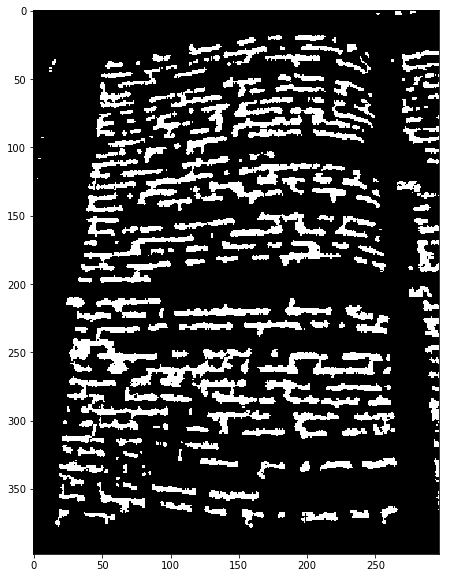

In [6]:
src4 = transform.filter_variance(src3, (text_line_delta//2, text_line_delta//2), 50, 50)
text_cutoff = np.percentile(src4, 90)/2
plt.figure(figsize=(10,10))
plt.imshow(src4 > text_cutoff, cmap='gray')

In [7]:
src5 = skimage.transform.rescale(src4>text_cutoff, scale=0.25)>0.0

c:\anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(100, 74)


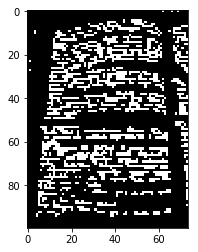

In [9]:
plt.imshow(src5, cmap='gray')
print(src5.shape)

In [17]:
src6 = skimage.filters.gaussian(src5, sigma=0.9)

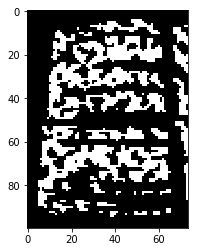

In [18]:
plt.imshow(src6>0.4, cmap='gray')